In [4]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

## Import the data

In [5]:
train_dataset = pd.read_csv("cs-training.csv", index_col = 0) #150000
test_dataset = pd.read_csv("cs-test.csv", index_col = 0) #101503
train_dataset.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
X_train = train_dataset.iloc[:, 1:]
y_train = train_dataset.iloc[:,0]
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
X_test = test_dataset.iloc[:, 1:]
X_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [8]:
X_train.info()
# MonthlyIncome中存在缺失值

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 1   age                                   150000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 3   DebtRatio                             150000 non-null  float64
 4   MonthlyIncome                         120269 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 6   NumberOfTimes90DaysLate               150000 non-null  int64  
 7   NumberRealEstateLoansOrLines          150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 12.6 MB


In [9]:
X_train.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [10]:
print(train_dataset.NumberOfDependents.max(),train_dataset.NumberOfDependents.min(), train_dataset.NumberOfDependents.mean())

20.0 0.0 0.7572222678605657


In [11]:
X_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20103
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2626
dtype: int64

In [12]:
y_train.isnull().sum()

0

In [13]:
y_train[y_train==1]

1         1
14        1
22        1
26        1
52        1
         ..
149955    1
149956    1
149962    1
149969    1
149980    1
Name: SeriousDlqin2yrs, Length: 10026, dtype: int64

## Outliers dealing

### age

In [14]:
print(train_dataset.age.max(),train_dataset.age.min(), train_dataset.age.mean())
# 对于 'age' 列，仅将等于0的值替换为中位数
median_age = X_train['age'].median()
X_train.loc[X_train['age'] == 0, 'age'] = median_age

109 0 52.295206666666665


### Fill Nan

In [15]:
print(X_train.MonthlyIncome.max(),X_train.MonthlyIncome.min(), X_train.MonthlyIncome.mean())
print(X_train.NumberOfDependents.max(),X_train.NumberOfDependents.min(), X_train.NumberOfDependents.mean())

3008750.0 0.0 6670.221237392844
20.0 0.0 0.7572222678605657


In [16]:
# 记录train_set的填补参数
MonthlyIncome_para = X_train['MonthlyIncome'].median()
NumberOfDependents_para = X_train['NumberOfDependents'].mode().iloc[0]
print(MonthlyIncome_para,NumberOfDependents_para)

5400.0 0.0


In [17]:
# 填补train_set
X_train.fillna({'MonthlyIncome': MonthlyIncome_para}, inplace=True)
X_train.fillna({'NumberOfDependents': NumberOfDependents_para}, inplace=True)
# 填补test_set
X_test.fillna({'MonthlyIncome': MonthlyIncome_para}, inplace=True)
X_test.fillna({'NumberOfDependents': NumberOfDependents_para}, inplace=True)

In [18]:
X_train.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

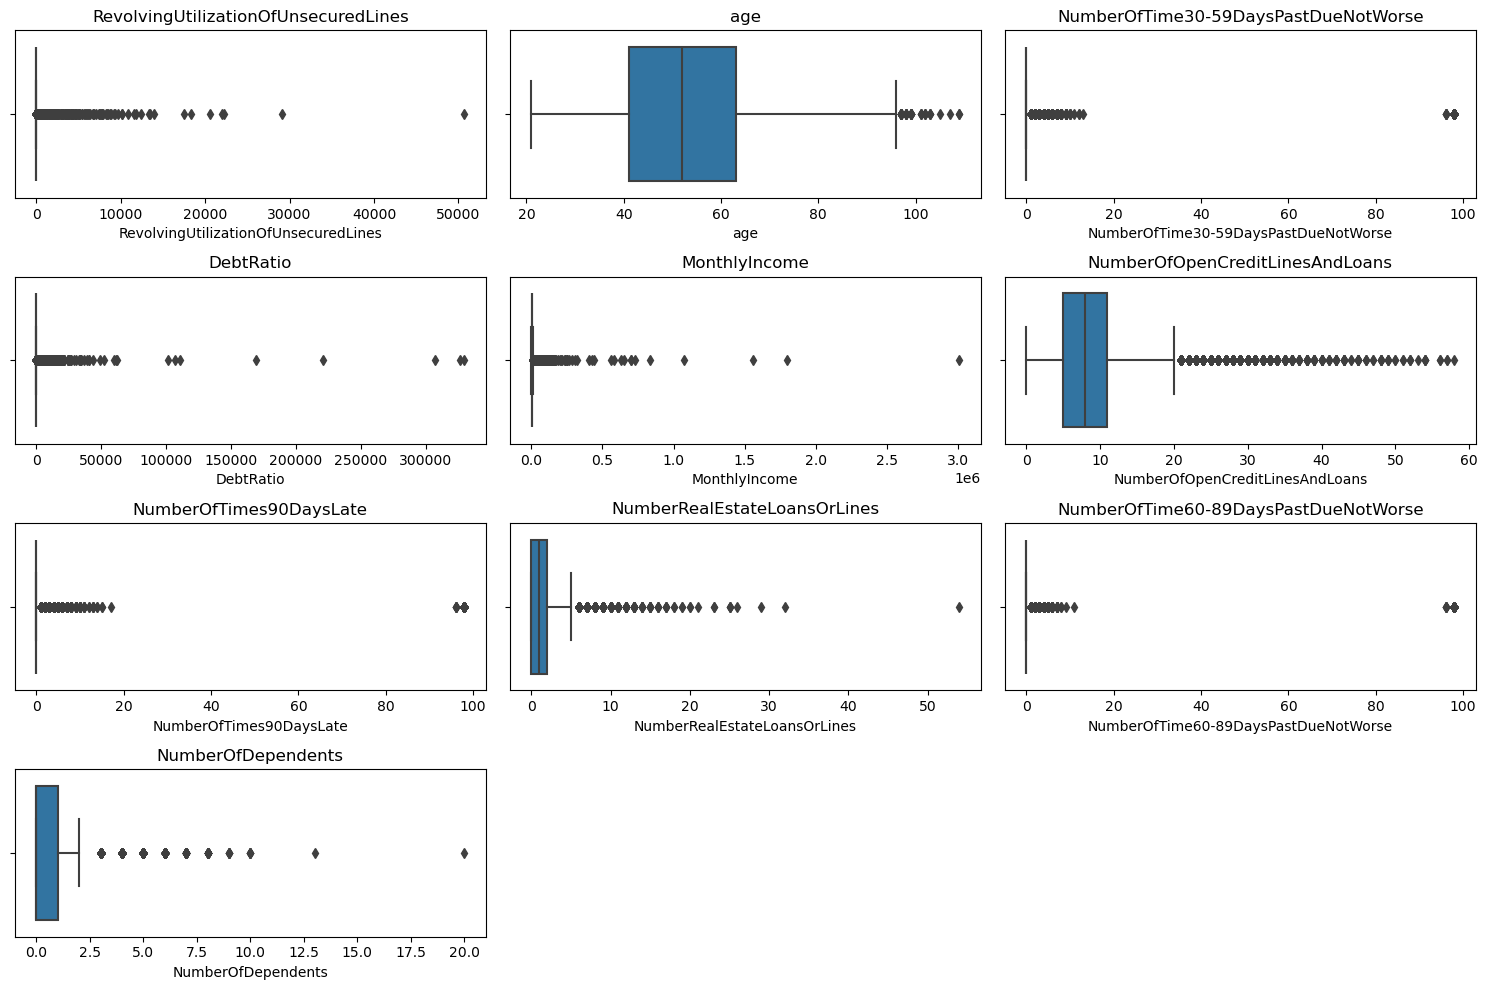

In [19]:
# 绘制箱型图来可视化每个特征的潜在异常值
plt.figure(figsize=(15, 10))

# 为数据集中的每个数值型列绘制箱型图
for i, column in enumerate(X_train.columns):
    plt.subplot((len(X_train.columns) + 2) // 3, 3, i+1)  # 调整布局以适应列的数量
    sns.boxplot(x=X_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## Normalization

In [17]:
from sklearn.preprocessing import StandardScaler

# 初始化标准化器
scaler = StandardScaler()

# 计算训练集的参数并进行归一化
X_train_scaled = scaler.fit_transform(X_train)

# 使用相同的参数来归一化测试集
X_test_scaled = scaler.transform(X_test)

## Select features

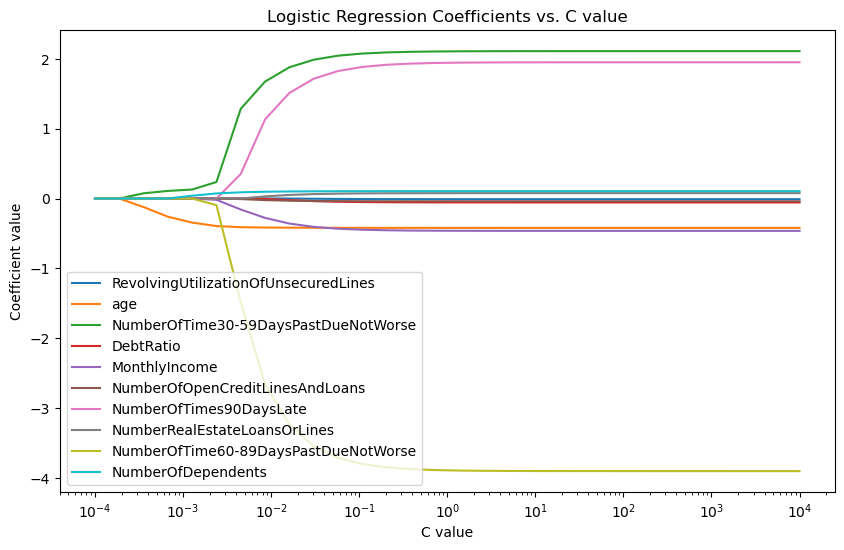

In [18]:
feature_names = X_train.columns.tolist()

# 定义不同的C值
C_values = np.logspace(-4, 4, 30)  # 从10^-4到10^4之间等比分布的30个值

# 存储每个C下的系数
coefficients = []

# 遍历C值，训练模型并收集系数
for C_val in C_values:
    model = LogisticRegression(penalty='l1', C=C_val, solver='liblinear')
    model.fit(X_train_scaled, y_train)
    coefficients.append(model.coef_[0])

# 转换为NumPy数组方便绘图
coefficients = np.array(coefficients)

# 绘制每个特征随C值变化的系数曲线
plt.figure(figsize=(10, 6))
for i, feature_name in enumerate(feature_names):
    plt.plot(C_values, coefficients[:, i], label=feature_name)

plt.xscale('log')  # C轴使用对数刻度
plt.xlabel('C value')
plt.ylabel('Coefficient value')
plt.title('Logistic Regression Coefficients vs. C value')
plt.legend()
plt.show()

##### 所以得到 NumberOfTime30-59DaysPastDueNotWorse 和 age 是比较重要的特征

In [19]:
X_selected = X_train_scaled[:, [1,2]]
y_train_np = y_train.values  # 如果y_train是Pandas Series
# X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_selected, y_train, test_size=0.2, random_state=42)

## Model

### LR

Best C: 0.01, Accuracy: 0.9333266666666666


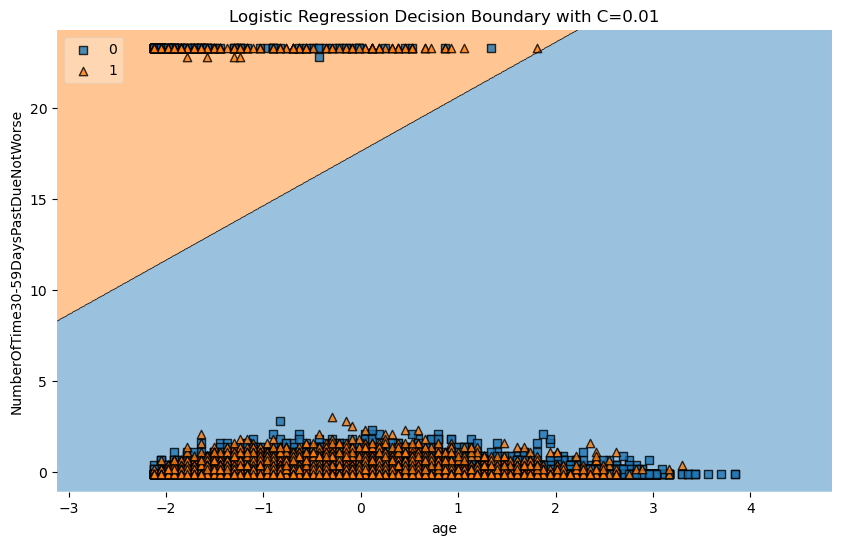

In [20]:
# 定义超参数 C 的值
C_values = [0.01, 0.1, 1, 10, 100]

# 初始化5折交叉验证
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 用于存储每个 C 值的平均准确率
mean_accuracies = []

# 遍历 C 值，使用逻辑回归并进行交叉验证
for C in C_values:
    model = LogisticRegression(C=C, random_state=42)
    scores = cross_val_score(model, X_selected, y_train_np, cv=kfold, scoring='accuracy')
    mean_accuracies.append(np.mean(scores))

# 找到最佳的 C 值和它的准确率
best_C = C_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)
print(f"Best C: {best_C}, Accuracy: {best_accuracy}")

# 使用最佳的 C 值重新训练模型并进行可视化
model = LogisticRegression(C=best_C, random_state=42)
model.fit(X_selected, y_train_np)

# 可视化决策边界
plt.figure(figsize=(10, 6))
plot_decision_regions(X_selected, y_train_np, clf=model, legend=2)
plt.title(f'Logistic Regression Decision Boundary with C={best_C}')
plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.show()

### DT: There exists imbalance problem

In [21]:
len(y_train_np[y_train_np==1])

10026

In [22]:
len(y_train_np[y_train_np==0])

139974

Best Depth: 5, Accuracy: 0.8513533333333333


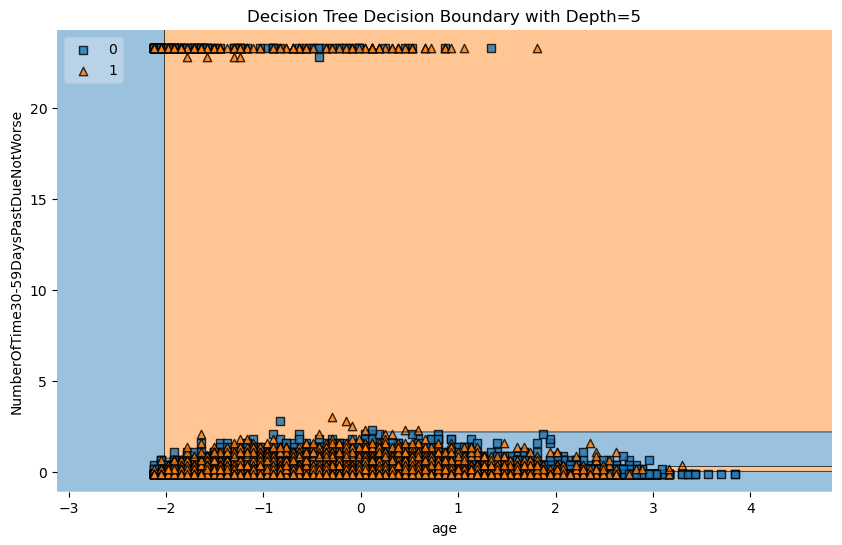

In [23]:
# 定义树深度范围
depth_values = [1, 2, 3, 4, 5, 6, 10]

class_weights = {0: 1, 1: 10}  # 类别 0 的权重为 1，类别 1 的权重为 10

# 初始化5折交叉验证
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 用于存储每个深度的平均准确率
mean_accuracies = []

# 遍历树深度，使用决策树进行交叉验证
for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight=class_weights)
    scores = cross_val_score(model, X_selected, y_train_np, cv=kfold, scoring='accuracy')
    mean_accuracies.append(np.mean(scores))

# 找到最佳的树深度和它的准确率
best_depth = depth_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)
print(f"Best Depth: {best_depth}, Accuracy: {best_accuracy}")

# 使用最佳的树深度重新训练模型并进行可视化
model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
model.fit(X_selected, y_train_np)

# 可视化决策边界
plt.figure(figsize=(10, 6))
plot_decision_regions(X_selected, y_train_np, clf=model, legend=2)
plt.title(f'Decision Tree Decision Boundary with Depth={best_depth}')
plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.show()

### SVM

Best Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}, Accuracy: 0.8143066666666666


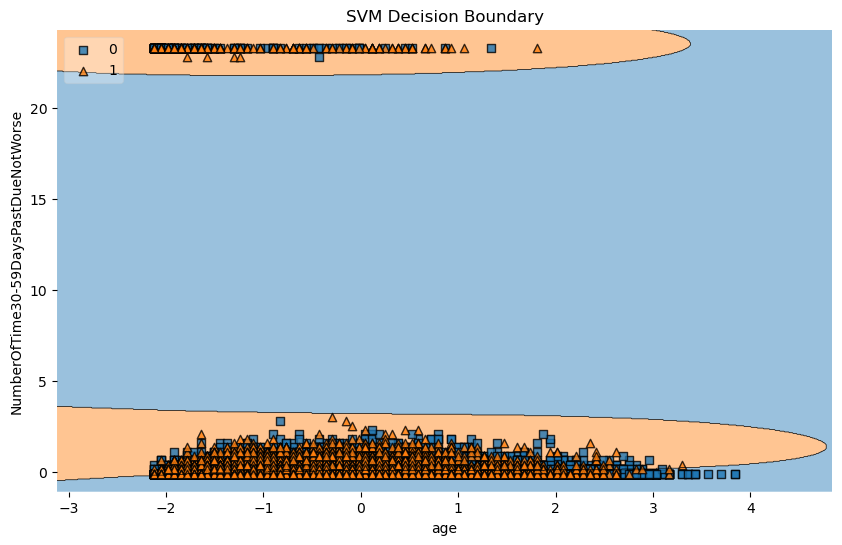

In [24]:
# 定义SVM的参数范围
param_grid = {
    'C': [1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['rbf'],
    'class_weight': ['balanced']  # 用于处理不平衡数据集
}

# 初始化5折交叉验证，并设置GridSearchCV来自动调参
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_selected, y_train_np)

# 找到最佳参数
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Best Parameters: {best_params}, Accuracy: {best_accuracy}")

# 使用最佳参数重新训练模型
best_model = SVC(**best_params)
best_model.fit(X_selected, y_train_np)

# 可视化决策边界
plt.figure(figsize=(10, 6))
plot_decision_regions(X_selected, y_train_np, clf=best_model, legend=2)
plt.title('SVM Decision Boundary')
plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.show()